# Feature analysis

- How is my data distributed?
- Are there outliers in my data?
- Are there missing values?
- Do we need to scale the data?

In our digit recognition program we only have numerical data. This means we have to:
- Look at distribution (describe in pandas)
- Spot outliers using min/max
- Look at distribution with standard deviation, quartiles and box plot
- Find missing values
- Plot using scatter plots, histograms



In [101]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import numpy as np

SIZE = 32

In [102]:
# IMPORTING OUR DATASET
data = pd.read_csv('../dataset-numpy/dataset-v7.csv')
data.describe()

,area,width,contours,radius,circle_dist,rect_dist,hull_radius,aspect_ratio,centroid_x,centroid_y,...,weight_7_0,weight_7_1,weight_7_2,weight_7_3,weight_7_4,weight_7_5,weight_7_6,weight_7_7,num_holes,label
count,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,...,1920,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000
mean,274.982813,19.552604,44.460938,10.097489,0.840045,0.112436,13.522600,0.826547,15.873832,15.419765,...,0,0.035937,4.961979,11.565625,11.079167,6.225521,1.733333,0.122917,0.417187,4.532813
std,67.304109,2.133224,9.181315,0.975741,0.335181,0.070463,0.857668,0.458459,1.215348,1.929772,...,0,0.500401,5.585016,4.935527,5.523363,6.307037,4.132351,1.130143,0.606905,2.868122
min,136.500000,9.000000,18.000000,7.951196,0.265258,0.000000,11.249110,0.275862,11.911111,9.997567,...,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,228.875000,18.000000,38.000000,9.383102,0.642986,0.052239,12.910241,0.586207,15.053731,14.118958,...,0,0.000000,0.000000,10.000000,9.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,259.000000,20.000000,44.000000,9.934555,0.767127,0.105063,13.439518,0.620690,15.808951,15.314223,...,0,0.000000,0.000000,13.000000,12.000000,7.000000,0.000000,0.000000,0.000000,5.000000
75%,303.625000,21.000000,51.000000,10.629674,0.970649,0.169002,14.077269,0.689655,16.606884,16.465136,...,0,0.000000,10.000000,16.000000,16.000000,12.000000,0.000000,0.000000,1.000000,7.000000
max,532.000000,28.000000,83.000000,13.614818,3.879402,0.335774,16.812836,3.125000,20.294118,21.140118,...,0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,2.000000,9.000000


## Trying to find relation for every feature grouped by the label

In [103]:
data_by_label = data.groupby(['label'])
LABEL_SIZE = len(data_by_label)
data_by_label.mean()

,area,width,contours,radius,circle_dist,rect_dist,hull_radius,aspect_ratio,centroid_x,centroid_y,...,weight_6_7,weight_7_0,weight_7_1,weight_7_2,weight_7_3,weight_7_4,weight_7_5,weight_7_6,weight_7_7,num_holes
label,,,,,,,,,,,,,,,,,,,,,
0,388.779661,19.796610,38.259887,11.870776,0.777770,0.083790,13.034776,0.684119,15.514661,15.849222,...,0.000000,0,0.000000,3.593220,13.502825,13.090395,4.870056,0.124294,0.000000,0.932203
1,270.823232,17.111111,34.085859,9.958356,1.164793,0.125550,13.371829,0.932315,15.965643,15.390697,...,0.106061,0,0.000000,1.540404,8.156566,12.161616,7.959596,1.606061,0.550505,0.000000
2,235.992308,20.912821,45.892308,9.756897,0.773286,0.117474,14.732701,0.644836,15.208349,16.731156,...,0.071795,0,0.082051,9.789744,13.789744,13.138462,12.246154,7.923077,0.523077,0.005128
3,237.283920,19.487437,51.050251,9.862909,0.909852,0.043312,14.196763,0.661723,16.888249,15.165510,...,0.000000,0,0.070352,8.964824,14.547739,12.899497,6.733668,0.683417,0.000000,0.000000
4,248.002688,21.290323,53.973118,9.164038,0.501170,0.183435,12.642562,1.261820,15.610866,16.109270,...,0.000000,0,0.000000,0.602151,5.661290,10.833333,1.731183,0.080645,0.037634,0.032258
5,234.566845,19.016043,46.647059,9.692429,0.972743,0.073314,13.866985,0.954613,14.987245,14.234905,...,0.000000,0,0.037433,8.058824,14.454545,10.272727,2.727273,0.187166,0.000000,0.010695
6,284.084615,19.958974,41.051282,10.637953,0.749967,0.167258,13.019047,0.608114,15.642559,18.978532,...,0.251282,0,0.000000,0.835897,10.200000,14.569231,12.958974,4.861538,0.092308,0.871795
7,236.489950,19.386935,48.190955,9.337271,0.803079,0.149348,13.477179,0.980296,16.800086,13.375708,...,0.000000,0,0.160804,7.396985,10.487437,0.633166,0.060302,0.000000,0.000000,0.000000
8,338.105556,18.927778,42.161111,10.245163,0.941357,0.065321,13.785627,0.784924,15.172695,15.364964,...,0.000000,0,0.000000,4.827778,13.194444,12.350000,6.072222,0.527778,0.000000,1.594444


In [104]:
# Create a different color for every label
colors = cm.rainbow(np.linspace(0, 1, len(data_by_label)))
# Make colors translucent
colors[:,-1] = .2

### Scatter Centroid per label

The weighted middle of the shape clearly separates some digits.

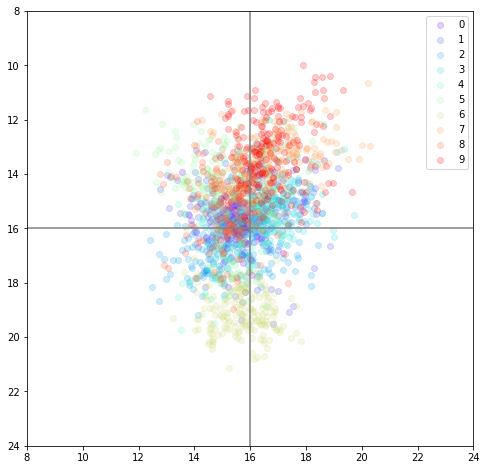

In [105]:
# Configure plot
fig, ax = plt.subplots(figsize=(8,8))
lim = [8, SIZE - 8]
ax.set(xlim=lim, ylim=lim)
# Invert y axis to 
ax.invert_yaxis()

# Plot centroids
for label_data, color in zip(data_by_label, colors):
    ax.scatter(label_data[1].centroid_x, label_data[1].centroid_y, label=str(label_data[0]), color=color)
# Draw center lines
ax.axvline(SIZE/2, color='gray')
ax.axhline(SIZE/2, color='gray')
ax.legend()
fig.savefig('label_centroid_scatter.png', dpi=200, bbox_inches='tight')

The 6 and the 9 centroids are flipped because that's how the digits also are.

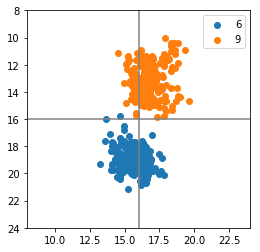

In [106]:
# Configure plot
fig, ax = plt.subplots(figsize=(4,4))
lim = [8, SIZE - 8]
ax.set(xlim=lim, ylim=lim)
# Invert y axis to 
ax.invert_yaxis()

# Plot centroids
for label_data in data_by_label:
    if label_data[0] == 6 or label_data[0] == 9:
        ax.scatter(label_data[1].centroid_x, label_data[1].centroid_y, label=str(label_data[0]))
# Draw center lines
ax.axvline(SIZE/2, color='gray')
ax.axhline(SIZE/2, color='gray')
ax.legend()

Unfortunately, not all numbers can be clearly distinctive like the round shaped 0 and 8. The centroid always lies in the middle.

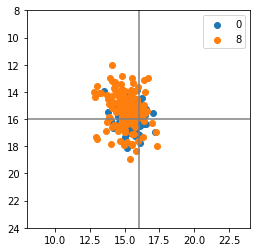

In [107]:
# Configure plot
fig, ax = plt.subplots(figsize=(4,4))
lim = [8, SIZE - 8]
ax.set(xlim=lim, ylim=lim)
# Invert y axis to 
ax.invert_yaxis()

# Plot centroids
for label_data in data_by_label:
    if label_data[0] == 0 or label_data[0] == 8:
        ax.scatter(label_data[1].centroid_x, label_data[1].centroid_y, label=str(label_data[0]))
# Draw center lines
ax.axvline(SIZE/2, color='gray')
ax.axhline(SIZE/2, color='gray')
ax.legend()

### Scatter Contours per label

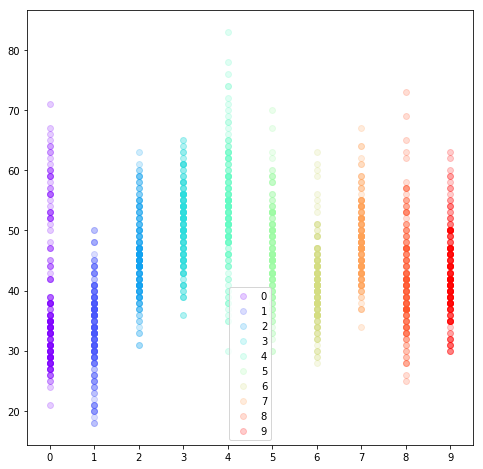

In [108]:
# Configure plot
fig, ax = plt.subplots(figsize=(8,8))
plt.xticks(np.arange(0, LABEL_SIZE, 1.0))

# Plot contours
for label_data, color in zip(data_by_label, colors):
    x_coords = [label_data[0] for _ in range(len(label_data[1].contours))]
    ax.scatter(x_coords, label_data[1].contours, label=str(label_data[0]), color=color)
ax.legend()
fig.savefig('label_contour_scatter.png', dpi=200, bbox_inches='tight')

### Scatter Area per label

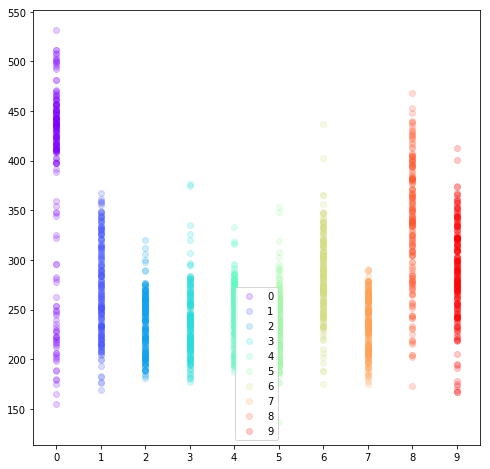

In [109]:
# Configure plot
fig, ax = plt.subplots(figsize=(8,8))
plt.xticks(np.arange(0, LABEL_SIZE, 1.0))

# Plot area
for label_data, color in zip(data_by_label, colors):
    x_coords = [label_data[0] for _ in range(len(label_data[1].area))]
    ax.scatter(x_coords, label_data[1].area, label=str(label_data[0]), color=color)
ax.legend()
fig.savefig('label_area_scatter.png', dpi=200, bbox_inches='tight')

### Scatter Width per label

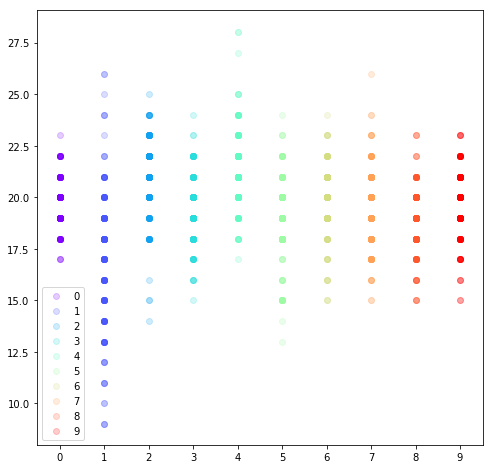

In [110]:
# Configure plot
fig, ax = plt.subplots(figsize=(8,8))
plt.xticks(np.arange(0, LABEL_SIZE, 1.0))

# Plot area
for label_data, color in zip(data_by_label, colors):
    x_coords = [label_data[0] for _ in range(len(label_data[1].width))]
    ax.scatter(x_coords, label_data[1].width, label=str(label_data[0]), color=color)
ax.legend()
fig.savefig('label_width_scatter.png', dpi=200, bbox_inches='tight')

### Scatter Radius per label

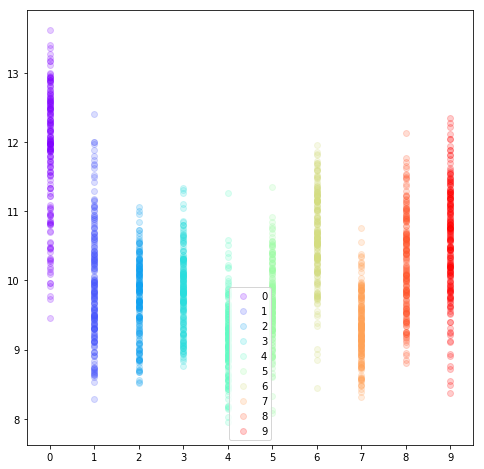

In [32]:
# Configure plot
fig, ax = plt.subplots(figsize=(8,8))
plt.xticks(np.arange(0, LABEL_SIZE, 1.0))

# Plot area
for label_data, color in zip(data_by_label, colors):
    x_coords = [label_data[0] for _ in range(len(label_data[1].radius))]
    ax.scatter(x_coords, label_data[1].radius, label=str(label_data[0]), color=color)
ax.legend()
fig.savefig('label_radius_scatter.png', dpi=200, bbox_inches='tight')

### Scatter Circle Distance per label

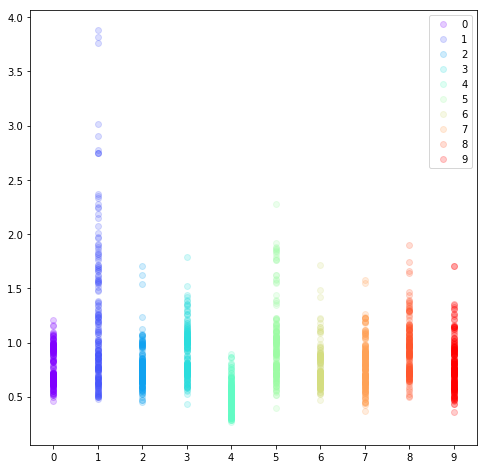

In [33]:
# Configure plot
fig, ax = plt.subplots(figsize=(8,8))
plt.xticks(np.arange(0, LABEL_SIZE, 1.0))

# Plot area
for label_data, color in zip(data_by_label, colors):
    x_coords = [label_data[0] for _ in range(len(label_data[1].circle_dist))]
    ax.scatter(x_coords, label_data[1].circle_dist, label=str(label_data[0]), color=color)
ax.legend()
fig.savefig('label_circ_dist_scatter.png', dpi=200, bbox_inches='tight')

### Scatter Rectangle Distance per label

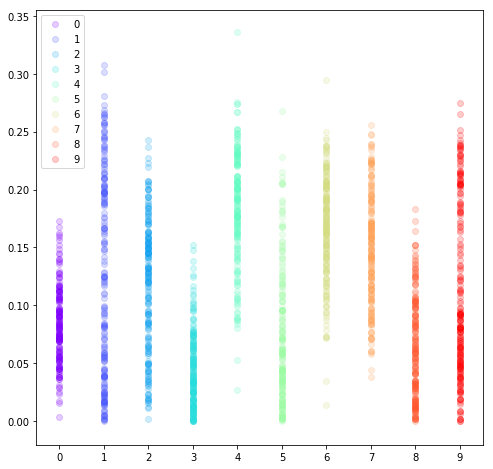

In [34]:
# Configure plot
fig, ax = plt.subplots(figsize=(8,8))
plt.xticks(np.arange(0, LABEL_SIZE, 1.0))

# Plot area
for label_data, color in zip(data_by_label, colors):
    x_coords = [label_data[0] for _ in range(len(label_data[1].rect_dist))]
    ax.scatter(x_coords, label_data[1].rect_dist, label=str(label_data[0]), color=color)
ax.legend()
fig.savefig('label_rect_dist_scatter.png', dpi=200, bbox_inches='tight')

### Scatter Hull Radius per label

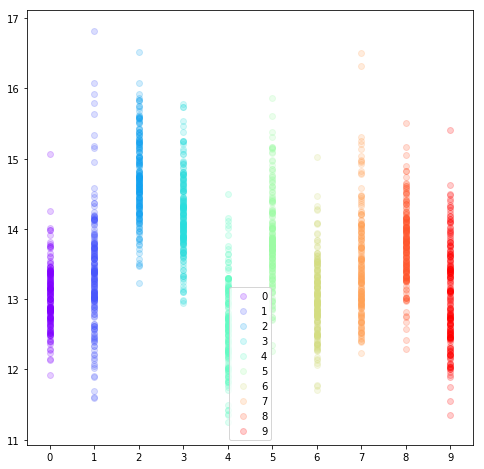

In [35]:
# Configure plot
fig, ax = plt.subplots(figsize=(8,8))
plt.xticks(np.arange(0, LABEL_SIZE, 1.0))

# Plot area
for label_data, color in zip(data_by_label, colors):
    x_coords = [label_data[0] for _ in range(len(label_data[1].hull_radius))]
    ax.scatter(x_coords, label_data[1].hull_radius, label=str(label_data[0]), color=color)
ax.legend()
fig.savefig('label_hull_radius_scatter.png', dpi=200, bbox_inches='tight')

### Scatter Aspect Ratio per label

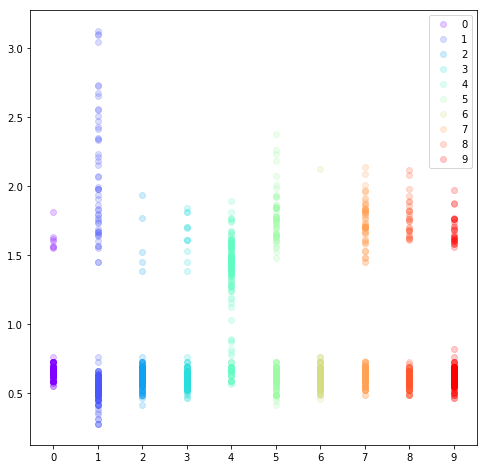

In [36]:
# Configure plot
fig, ax = plt.subplots(figsize=(8,8))
plt.xticks(np.arange(0, LABEL_SIZE, 1.0))

# Plot area
for label_data, color in zip(data_by_label, colors):
    x_coords = [label_data[0] for _ in range(len(label_data[1].aspect_ratio))]
    ax.scatter(x_coords, label_data[1].aspect_ratio, label=str(label_data[0]), color=color)
ax.legend()
fig.savefig('label_aspect_ratio_scatter.png', dpi=200, bbox_inches='tight')

### Scatter Angle per label

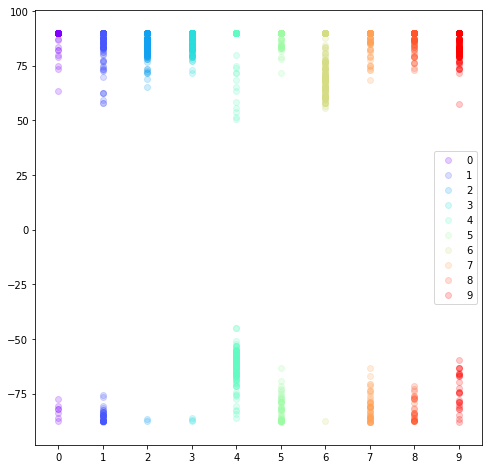

In [37]:
# Configure plot
fig, ax = plt.subplots(figsize=(8,8))
plt.xticks(np.arange(0, LABEL_SIZE, 1.0))

# Plot area
for label_data, color in zip(data_by_label, colors):
    x_coords = [label_data[0] for _ in range(len(label_data[1].angle))]
    ax.scatter(x_coords, label_data[1].angle, label=str(label_data[0]), color=color)
ax.legend()
fig.savefig('label_angle_scatter.png', dpi=200, bbox_inches='tight')

### Scatter Corners per label

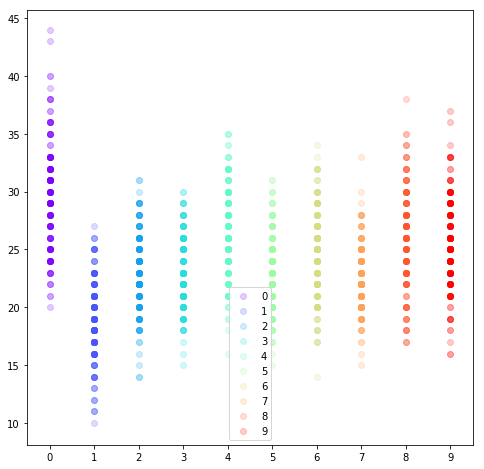

In [38]:
# Configure plot
fig, ax = plt.subplots(figsize=(8,8))
plt.xticks(np.arange(0, LABEL_SIZE, 1.0))

# Plot area
for label_data, color in zip(data_by_label, colors):
    x_coords = [label_data[0] for _ in range(len(label_data[1].corners))]
    ax.scatter(x_coords, label_data[1].corners, label=str(label_data[0]), color=color)
ax.legend()
fig.savefig('label_corners_scatter.png', dpi=200, bbox_inches='tight')

### Scatter Circles per label

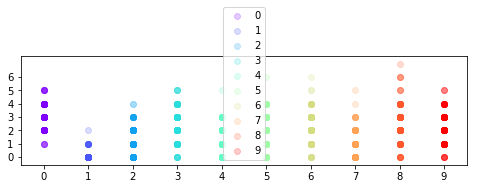

In [39]:
# Configure plot
fig, ax = plt.subplots(figsize=(8,2))
plt.yticks([0, 1, 2, 3, 4, 5, 6])
plt.xticks(np.arange(0, LABEL_SIZE, 1.0))

# Plot area
for label_data, color in zip(data_by_label, colors):
    x_coords = [label_data[0] for _ in range(len(label_data[1].circles))]
    ax.scatter(x_coords, label_data[1].circles, label=str(label_data[0]), color=color)
ax.legend()
fig.savefig('label_circles_scatter.png', dpi=200, bbox_inches='tight')

### Low res digit heatmap

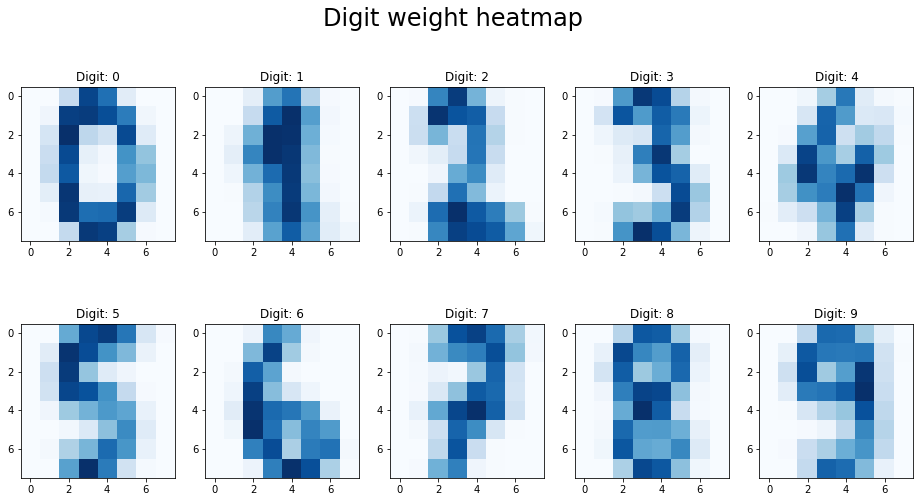

In [79]:
means = data_by_label.mean()
COUNT = 8
def mean_weight_matrix(label):
    m = np.zeros((COUNT,COUNT))
    for x in range(COUNT):
        for y in range(COUNT):
            m[x][y] = means['_'.join(['weight', str(x), str(y)])][label]
    return m

fig, axs = plt.subplots(2, int(LABEL_SIZE / 2), figsize=(16,8))
fig.suptitle('Digit weight heatmap', fontsize=24)
for i in range(LABEL_SIZE):
    sub_fig = axs[1 if i > (LABEL_SIZE / 2.0 - 1) else 0][int(i % (LABEL_SIZE / 2))]
    sub_fig.set_title('Digit: ' + str(i))
    sub_fig.imshow(mean_weight_matrix(i), cmap='Blues', interpolation='nearest')

# fig.savefig('label_clean_weight_heatmaps.png', dpi=200, bbox_inches='tight')

### Scatter Num of Holes per label

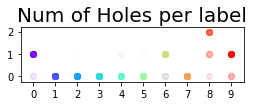

In [41]:
# Configure plot
fig, ax = plt.subplots(figsize=(4,1))
plt.xticks(np.arange(0, LABEL_SIZE, 1.0))
plt.yticks([0, 1, 2])
plt.title('Num of Holes per label', fontsize=20)

# Create a different color for every label
colors = cm.rainbow(np.linspace(0, 1, len(data_by_label)))
# Make colors translucent
colors[:,-1] = .006
# Plot area
for label_data, color in zip(data_by_label, colors):
    x_coords = [label_data[0] for _ in range(len(label_data[1].num_holes))]
    ax.scatter(x_coords, label_data[1].num_holes, label=str(label_data[0]), color=color)
fig.savefig('label_holes_scatter.png', dpi=200, bbox_inches='tight')

### Box Num of Holes per label

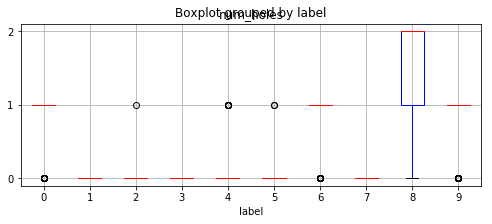

In [42]:
fig, ax = plt.subplots(figsize=(8,3))
plt.yticks([0, 1, 2])
plt.grid(which='major', axis='y')
plt.title('Num of Holes per label', fontsize=20)
ax = data.boxplot(column='num_holes', by='label', return_type='axes', ax=ax)
fig.savefig('label_holes_box.png', dpi=200, bbox_inches='tight')

## Creating a Cleaner Dataset

*Further down below the outdated manual feature selection*

We wanted to see if there was a simple way to let the model select it's own features to use in the training. 

- SelectFromModel: Meta-transformer for selecting features based on importance weights.

In [136]:
# Using Feature selection to get cleaner data
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.svm import SVR

# Feature selection tool: SelectFromModel
def sfm(X, y):
    lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)
    model = SelectFromModel(lsvc, prefit=True)

    # Transform the data
    sfm = model.transform(X)

    columns = X.columns[model.get_support()]
    return pd.DataFrame(sfm, columns=columns)

In [137]:
# Split the data
X, y = data.iloc[:,:-1], data.iloc[:,-1]
data_clean_auto = sfm(X, y)

print("Features in the dataset")
print("Before:    {}".format(X.shape[1]))
print("After sfm: {}".format(data_clean_auto.shape[1]))

data_clean_auto.describe()

Features in the dataset
Before:    78
After sfm: 56


,area,width,contours,radius,centroid_x,centroid_y,corners,circles,angle,weight_0_2,...,weight_6_4,weight_6_5,weight_6_6,weight_7_2,weight_7_3,weight_7_4,weight_7_5,weight_7_6,weight_7_7,num_holes
count,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,...,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000
mean,274.982813,19.552604,44.460938,10.097489,15.873832,15.419765,24.228125,1.707292,56.663681,4.630208,...,9.207812,8.878125,3.134375,4.961979,11.565625,11.079167,6.225521,1.733333,0.122917,0.417187
std,67.304109,2.133224,9.181315,0.975741,1.215348,1.929772,4.396815,1.309662,62.334125,5.333165,...,6.205281,6.417370,5.171843,5.585016,4.935527,5.523363,6.307037,4.132351,1.130143,0.606905
min,136.500000,9.000000,18.000000,7.951196,11.911111,9.997567,10.000000,0.000000,-87.954590,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,228.875000,18.000000,38.000000,9.383102,15.053731,14.118958,21.000000,1.000000,74.054605,0.000000,...,0.000000,0.000000,0.000000,0.000000,10.000000,9.000000,0.000000,0.000000,0.000000,0.000000
50%,259.000000,20.000000,44.000000,9.934555,15.808951,15.314223,24.000000,2.000000,87.510447,0.000000,...,11.000000,11.000000,0.000000,0.000000,13.000000,12.000000,7.000000,0.000000,0.000000,0.000000
75%,303.625000,21.000000,51.000000,10.629674,16.606884,16.465136,27.000000,3.000000,90.000000,9.000000,...,15.000000,15.000000,7.000000,10.000000,16.000000,16.000000,12.000000,0.000000,0.000000,1.000000
max,532.000000,28.000000,83.000000,13.614818,20.294118,21.140118,44.000000,7.000000,90.000000,16.000000,...,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,2.000000


In [138]:
# Save dataset to .csv
data_clean_auto['label'] = y
data_clean_auto.to_csv('../dataset-numpy/dataset-v9.csv', sep=',', encoding='utf-8', index=False)

## (Outdated) Manual feature selection 
Columns that are not distinctive enough and should be filtered by hand:

- Circle Distance
- Rectangle Distance
- Aspect Ratio
- Angle
- Pixel Count columns that averages too close to 0 (< .015)
  - 0,0
  - 1,0
  - 2,0
  - 3,0; 3,7
  - 4,0; 4,7
  - 5,0?; 5,7?
  - 6,0?
  - 7,0

Determine which pixel count columns are distinctive enough. (comes down to the middle 4 colums)

OUTDATED. Did not perform better.

In [134]:
# Clean pixel counts too close to 0
cleaner = data_clean_auto.copy()

# Only select means of pixel count columns
pixel_counts_columns = cleaner.iloc[:, cleaner.columns.str.startswith('weight')].columns
means = cleaner[pixel_counts_columns].mean()

# Drop pixel count columns with low variance
print cleaner.shape
cleaner = cleaner.drop(means[means < 3].index, axis=1)
print cleaner.shape
cleaner.columns

(1920, 57)
(1920, 43)


Index([u'area', u'width', u'contours', u'radius', u'centroid_x', u'centroid_y',
       u'corners', u'circles', u'angle', u'weight_0_2', u'weight_0_3',
       u'weight_0_4', u'weight_0_5', u'weight_1_2', u'weight_1_3',
       u'weight_1_4', u'weight_1_5', u'weight_2_2', u'weight_2_3',
       u'weight_2_4', u'weight_2_5', u'weight_3_2', u'weight_3_3',
       u'weight_3_4', u'weight_3_5', u'weight_4_2', u'weight_4_3',
       u'weight_4_4', u'weight_4_5', u'weight_5_2', u'weight_5_3',
       u'weight_5_4', u'weight_5_5', u'weight_6_2', u'weight_6_3',
       u'weight_6_4', u'weight_6_5', u'weight_6_6', u'weight_7_2',
       u'weight_7_3', u'weight_7_4', u'weight_7_5', u'num_holes'],
      dtype='object')

In [ ]:
# Copy dataset and remove not distinctive columns
del data_clean['circle_dist']
del data_clean['rect_dist']
del data_clean['aspect_ratio']
del data_clean['angle']

data_clean.describe()

In [46]:
data_clean.groupby(['label', 'num_holes']).size()

label  num_holes
0      0             12
       1            165
1      0            198
2      0            194
       1              1
3      0            199
4      0            180
       1              6
5      0            185
       1              2
6      0             25
       1            170
7      0            199
8      0             13
       1             47
       2            120
9      0             34
       1            170
dtype: int64